# **Keras Tuner | Hyperparameter Tuning a Neural Network**


Datasets : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Colab : https://colab.research.google.com/drive/17M_HtK1wd9U5Qq3TZxcWBhyKqtHHBatQ#scrollTo=6iyw41QtxeSI

In [15]:
import pandas as pd
import numpy as np
import kerastuner as kt

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# df.corr()['Outcome'].sort_values(ascending=True)  # Sorts in ascending order
df.corr()['Outcome'].sort_values(ascending=False)  # Sorts in decending order


,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

**Scaling**

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [7]:
X = sc.fit_transform(X)

In [8]:
print(X[1])

[-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
 -0.36506078 -0.19067191]


In [9]:
X.shape

(768, 8)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5314 - loss: 0.6940 - val_accuracy: 0.6558 - val_loss: 0.6526
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6530 - loss: 0.6441 - val_accuracy: 0.7403 - val_loss: 0.5951
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7498 - loss: 0.5900 - val_accuracy: 0.7403 - val_loss: 0.5503
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7330 - loss: 0.5577 - val_accuracy: 0.7468 - val_loss: 0.5111
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7491 - loss: 0.5321 - val_accuracy: 0.7597 - val_loss: 0.4822
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.5246 - val_accuracy: 0.7532 - val_loss: 0.4696
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7865 - loss: 0.4891 - val_accuracy: 0.7532 - val_loss: 0.4560
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7828 - loss: 0.4811 - val_accuracy: 0.7532 - 

In [31]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8244 - loss: 0.4890 


[0.4836036264896393, 0.798701286315918]

## **Hyperparameter**

1. How to select appropriate optimizer
2. No. of nodes in a layer
3. How to select no. of hidden layers
4. All in all one model

**Kerastuner For Hyper parameter**
https://keras.io/keras_tuner/

In [33]:
pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [14]:
import kerastuner as kt

<ipython-input-14-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


**bulid model on different optimizer**

karas optimizer:
https://keras.io/api/optimizers/

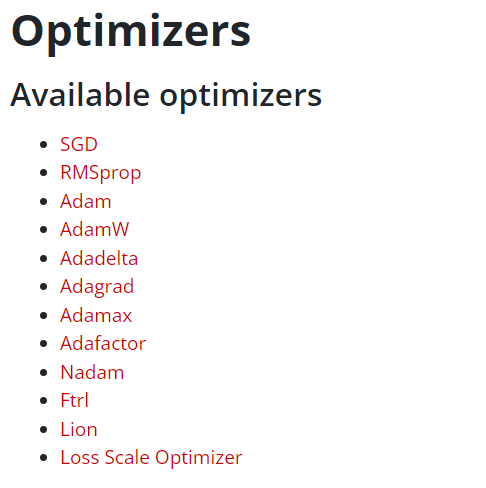

In [35]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim=8))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  optimizer=hp.Choice('optimizer',values = ['Adam','RMSprop','NAG','Adagrad',"Adadelta",'Rmsprop','Momentum'])

  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

### **Tuner object**

In [36]:
tunner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
tunner.search(X_train,y_train,epochs=25,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.8311688303947449

Best val_accuracy So Far: 0.8311688303947449
Total elapsed time: 00h 00m 18s


**Best Tunner**

In [38]:
tunner.get_best_hyperparameters()[0].values

{'optimizer': 'Rmsprop'}

**Extract model**

In [44]:
model = tunner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7542 - loss: 0.5254 - val_accuracy: 0.8312 - val_loss: 0.4404
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7472 - loss: 0.5165 - val_accuracy: 0.8117 - val_loss: 0.4271
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7795 - loss: 0.4783 - val_accuracy: 0.8117 - val_loss: 0.4177
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7670 - loss: 0.4882 - val_accuracy: 0.8117 - val_loss: 0.4152
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7598 - loss: 0.4685 - val_accuracy: 0.8247 - val_loss: 0.4179
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7328 - loss: 0.5098 - val_accuracy: 0.8052 - val_loss: 0.4130
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7856 - loss: 0.4411 - val_accuracy: 0.8247 - val_loss: 0.4146
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7867 - loss: 0.4481 - val_accuracy: 0.8312 - val_loss

In [47]:
model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8348 - loss: 0.4297 


[0.4313042461872101, 0.8116883039474487]

## **Now Find how much dense layer In starting.**

In [48]:
def build_model(hp):
  model = Sequential()

  unit = hp.Int('units', min_value=8, max_value=512, step=16)
  model.add(Dense(units = unit, activation='relu', input_dim=8))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) # We already find rmsprop is best one.
  return model

In [51]:
tunner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,
                         directory = 'mydir')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
tunner.search(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.8246753215789795

Best val_accuracy So Far: 0.8311688303947449
Total elapsed time: 00h 00m 51s


In [53]:
tunner.get_best_hyperparameters()[0].values

{'units': 72}

In [54]:
model = tunner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [55]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7475 - loss: 0.4720 - val_accuracy: 0.8182 - val_loss: 0.4198
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7687 - loss: 0.4535 - val_accuracy: 0.8247 - val_loss: 0.4275
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7632 - loss: 0.4723 - val_accuracy: 0.8117 - val_loss: 0.4198
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7536 - loss: 0.4758 - val_accuracy: 0.8052 - val_loss: 0.4197
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7854 - loss: 0.4442 - val_accuracy: 0.8052 - val_loss: 0.4235
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7693 - loss: 0.4518 - val_accuracy: 0.8052 - val_loss: 0.4229
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7577 - loss: 0.4628 - val_accuracy: 0.7987 - val_loss: 0.4265
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7805 - loss: 0.4458 - val_accuracy: 0.8052 - val_lo

In [56]:
model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8461 - loss: 0.4791 


[0.48195698857307434, 0.8116883039474487]

## **Number Of Hidden Layers**

In [58]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(72, activation='relu', input_dim=8)) # we already fine 72 is best for starting

  #
  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    model.add(Dense(72, activation='relu'))

  model.add(Dense(1,activation = 'sigmoid'))

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) # we already find RMSprop is best
  return model

In [59]:
tunner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,
                         directory = 'mydir',
                         project_name = 'Hidden_layer_find')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
tunner.search(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 13s]
val_accuracy: 0.8116883039474487

Best val_accuracy So Far: 0.8376623392105103
Total elapsed time: 00h 00m 59s


In [61]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 1}

In [62]:
model = tunner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [63]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7983 - loss: 0.4354 - val_accuracy: 0.8117 - val_loss: 0.4416
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8212 - loss: 0.3821 - val_accuracy: 0.8247 - val_loss: 0.4513
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7991 - loss: 0.4261 - val_accuracy: 0.8312 - val_loss: 0.4405
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8101 - loss: 0.3913 - val_accuracy: 0.7987 - val_loss: 0.4380
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8251 - loss: 0.3987 - val_accuracy: 0.8182 - val_loss: 0.4513
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8526 - loss: 0.3364 - val_accuracy: 0.8117 - val_loss: 0.4451
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7951 - loss: 0.4312 - val_accuracy: 0.8117 - val_loss: 0.4498
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8217 - loss: 0.3695 - val_accuracy: 0.8247 - val_los

In [64]:
model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8131 - loss: 0.5373 


[0.5251932144165039, 0.7922077775001526]

# **All In one**

**keras activation :** https://keras.io/api/layers/activations/

**keras optimizer :**

In [35]:
from itertools import count
from keras.layers import Dense, Dropout

def build_model(hp):

  model = Sequential()

  counter = 0

  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    if counter == 0:
      model.add(
          Dense(
              hp.Int('units' + str(i), min_value=8, max_value=512, step=16),
              activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']),
              input_dim=8))
      model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
    else:
      model.add(
          Dense(
              hp.Int('units' + str(i), min_value=8, max_value=512, step=16),
              activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']))
          )
      model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

    counter += 1
  model.add(Dense(1, activation='sigmoid'))
  model.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'nadam','SGD','Loss Scale Optimizer','Lion',"Ftrl",'Adafactor','Adamax','Adagrad','Adadelta','AdamW']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
  return model

In [36]:
tunner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,
                         directory = 'mydir',
                         project_name = 'All_in_one2')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Train**

In [37]:
tunner.search(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.8246753215789795

Best val_accuracy So Far: 0.8246753215789795
Total elapsed time: 00h 01m 19s


In [38]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 216,
 'activation0': 'relu',
 'dropout0': 0.7,
 'optimizer': 'adam',
 'units1': 8,
 'activation1': 'tanh',
 'dropout1': 0.9,
 'units2': 24,
 'activation2': 'relu',
 'dropout2': 0.7,
 'units3': 472,
 'activation3': 'tanh',
 'dropout3': 0.1,
 'units4': 296,
 'activation4': 'sigmoid',
 'dropout4': 0.0,
 'units5': 360,
 'activation5': 'sigmoid',
 'dropout5': 0.1,
 'units6': 88,
 'activation6': 'relu',
 'dropout6': 0.7,
 'units7': 392,
 'activation7': 'relu',
 'dropout7': 0.3,
 'units8': 328,
 'activation8': 'tanh',
 'dropout8': 0.6}

In [39]:
model = tunner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [40]:
model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7851 - loss: 0.4631 - val_accuracy: 0.8182 - val_loss: 0.4317
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7912 - loss: 0.4315 - val_accuracy: 0.8182 - val_loss: 0.4317
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7816 - loss: 0.4472 - val_accuracy: 0.8182 - val_loss: 0.4316
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8039 - loss: 0.4441 - val_accuracy: 0.8182 - val_loss: 0.4325
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 - loss: 0.4562 - val_accuracy: 0.8117 - val_loss: 0.4363
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7904 - loss: 0.4491 - val_accuracy: 0.8182 - val_loss: 0.4341
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7801 - loss: 0.4667 - val_accuracy: 0.8052 - val_loss: 0.4388
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7699 - loss: 0.4701 - val_accuracy: 0.8052 - 

In [41]:
model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8426 - loss: 0.4667 


[0.4626128077507019, 0.8181818127632141]